# Week 4: Cellular automata

<div style="margin: 1.5em 0; border-right: 4px solid #888; padding-right: 1em; text-align: right;">
  <div style="font-style: italic; font-family: 'Comic Neue', 'Segoe Script', cursive; font-size: 1.2em;">
It always bothers me that according to the laws as we understand them today, it takes a computing machine an infinite number of logical operations to figure out what goes on in no matter how tiny a region of space, and no matter how tiny a region of time. How can all that be going on in that tiny space? Why should it take an infinite amount of logic to figure out what one tiny piece of space/time is going to do? So I have often made the hypothesis ultimately physics will not require a mathematical statement, that in the end the machinery will be revealed and the laws will turn out to be simple, like the chequer board with all its apparent complexities. But this is just speculation. 
  </div>
  <div style="font-style: normal; font-size: 0.95em; margin-top: 0.5em;">
    — Richard Feynman, <em>The Character of Physical Law </em>, - Ch. 2
  </div>
</div>


<div style="margin: 1.5em 0; border-right: 4px solid #888; padding-right: 1em; text-align: right;">
  <div style="font-style: italic; font-family: 'Comic Neue', 'Segoe Script', cursive; font-size: 1.2em;">
    You don't educate people by telling them useful things, you educate people by showing them interesting things
  </div>
  <div style="font-style: normal; font-size: 0.95em; margin-top: 0.5em;">
    — John Conway 
  </div>
</div>


<div style="background-color: #ffff88; padding: 1em; border-left: 5px solid #fff102;">

We've see an example of continuous field models with PDEs that were coarse-grained for a discrete approximation that allowed for simulation.

Spatio-temporal dynamics may also be appropriately modelled intentionally as a discrete dynamical system...

</div>

# Automaton (singular) Automata (plural)

Automata are very simple machines (or systems) that change **state** in a **rule-governed** way.

![](images/Mechanical_Pinochio.gif)


<div style="background-color: #ffff88; padding: 1em; border-left: 5px solid #fff102;">

This follows the typical pattern in English where some words derived from Greek or Latin use the "a" ending for plural, much like datum (singular) and data (plural).
</div>

## State
Machines are fundamentally defined by their **state**, which is finite and discrete (usually).

Automata are therefore often referred to as 'finite state automata'/'finite state machines' or simply 'cells'.

## Rules
Machines update their state using a **state-transition function**, which depends on the cell's current state and (usually) that of its neighbours.

They are simple, local, deterministic rules for iterating an initial configuration of cells.

They are often formed as "if-then" statements, which are inherently nonlinear. 

<div style="border-left: 4px solid #1e70bf; padding: 0.75em; background-color: #eaf3fb; margin-bottom: 1em;">
  <strong>Theoretical Question:</strong><br>
    In physics, linear systems follow the superposition principle. Why doesn’t this principle work for cellular automata, and what does that tell us about the nature of their rules?
</div>

```{toggle}  my answers...
No Superposition Principle: In linear systems, the principle of superposition holds, meaning the combined effect of two inputs is simply the sum of their individual effects. In cellular automata, this principle doesn't apply because the combined effect of neighboring cells cannot generally be decomposed into a simple sum of individual effects.
```

# Cellular automata

Invented in 1940s by Stanislaw Ulam and John von Neumann, who were especially interested in logical requirements for machine self-replication 

![](images/Ulam_vonNeumann.png)

<!-- von Neumann was interested in self-reporoduction in a biological context and Stanislaw Ulam suggested using a cell-based concept -->



John von Neumann sought to model machine self-reproduction, inspired by biology. At Stanislaw Ulam’s suggestion, he adopted a grid of interacting cells — a discrete framework that became the basis of cellular automata.

![](images/self_replicating_machine.png)


He was thinking in the context of space exploration and hypothetical spacecraft that could land on a planet, harvest local materials, and build copies of themselves to continue exploring. 

The specific model had:
- many identical automata/cells were arranged uniformly on a lattice
- cells interacted/exchanged information with their 4 neighbouring cells (hence, this being named the von Neumann neighbourhood)
- 29 possible states for each cell
- and many complicated rules for how a cell in one state would change to another

He did all of this (for at least a few iterations) with pen and paper! 

This highlights two key points: 
1. the simulations are extremely rudimentary 
2. yet highly complex behaviour can emerge. 

In general, cellular automata (CA) are spatially distributed dynamical systems with both space and time discretised.

They are simple to define, straightforward to simulate, and widely used in Complex Systems modelling. Applications range from hydrodynamics to the growth and morphogenesis of living organisms, ecology, traffic flow, and social or economic dynamics.

We’ll now look at the typical set-up. While there are common conventions, nothing is sacred when it comes to cellular automata.

## The world

We must define the space the automata live in (one automata resides at each lattice site).

In cellular automata, these discretisation choices — lattice type, initial conditions, and boundary rules — define the “world” in which the dynamics unfold and can profoundly shape the patterns that emerge.

![](images/Regular_tilings.svg)

[Figure from Wolfram](https://mathworld.wolfram.com/Tessellation.html)

<div style="background-color: #ffff88; padding: 1em; border-left: 5px solid #fff102;">
    
The numbers in the brackets ${p,q}$ are the Schläfli symbol for a regular tiling:
- $p =$ the number of sides of each regular polygon in the tiling.
- $q =$ the number of polygons that meet at each vertex.

These three are the only regular tilings of the Euclidean plane because they are the only $\{p, q\}$ pairs that satisfy the flatness condition:

$$
\frac{1}{p} + \frac{1}{q} = \frac{1}{2}.
$$

(Euler’s formula for planar graphs, $V−E+F=2$, for finite patches, and 
$V−E+F=0$ in the infinite tiling limit leads to the same constraint.)
</div>

These are the typical (regular) tilings of the Euclidean plane but you could also dream up more exotic ones.

When choosing a discretisation for a model, key features to consider include:

- **Dimension, size, and lattice type**
  – e.g., squares, hexagons, triangles, or more irregular geometries.

- **Initial conditions**
  – Simple, random, or domain-specific (structured/patterned).
  – Can strongly influence the system’s evolution and resulting dynamics.

- **Boundary conditions**
  – No boundaries: Assume space is infinite.
  – Periodic boundaries: Space “wraps around” in each spatial direction (e.g., a ring in 1D, a torus in 2D).
  – Cut-off boundaries: Edge cells lack neighbours beyond the boundary.
  – Fixed boundaries: Edge cells are held in fixed states and do not update.


## State 
Each automaton is a dynamical state variable with a finite number of states available.


The state is often simply binary (sometimes called 'two-state cellular automata'):
- 0, off, blank, white, dead, ... 
- 1, on, filled, back, alive, ...

This state changes in time according to some rule.

The state of all the cells (the pattern produced) is the **configuration**.

## Network 
Which cells can a given cell see? (and use to make decisions).

Same *local* neighbourhood template is used by all cells. It is typically centred at the cell of interest for some radius and some notion of distance.

### Distance
The geometry of the lattice means the usual (Euclidean) distance function or metric isn't sensible

The typical neighbourhood templates consider all cells within a distance $d$: 
- von Neumann (NESW) is an $L_1$ norm (aka manhattan/taxicab distance):

$$
d_1=\sum_i|x_i|
$$
- Moore (includes corners) is an $L_{\infty}$ norm
$$
d_{\infty}=\max_i|x_i|
$$

More exotic or more general option can also be considered:
- e.g. directional neighbourhoods or neighbourhoods that are a function of the state
- e.g. in general we could consider the adjacent vertices of a vertex to be the neighbourhood if we operated the CA on a complex network.

## Update rule

The state of all cells within the neighbourhood feeds into the state-transition function, which provides the dynamics (defines the physics).



\begin{equation*}
s_{t+1}(x) = F\left[s_{t}(x+x_{0}), s_{t}(x+x_{1}), \ldots, s_{t}(x+x_{n-1})\right],
\end{equation*}
- $s_{t}(x)$ is the state of the automaton located at $x$ at time $t$,
- $F$ is the state-transition function. It can be described lookup table, algorithm, mathematical formula, ...
- and $N=\{x_{0}, x_{1}, \ldots, x_{n-1}\}$ is the neighbourhood.

Updating of all cells is usually synchronous in step with a universal clock.

We will now explore the two most (in)famous examples: 
1. Wolfram's Elementary Cellular Automata; and 
2. Conway's two-dimensional Game of Life.

# Wolfram's elementary CA
These are the simplest class of *one-dimensional cellular automata*. 



Wolfram has studied them extensively! His tomb *'A new kind of science'* rubbed many people the wrong way and some of the reviews are far more entertaining than the book itself.

Nevertheless, these CA are an important starting point for our studies.

They weren't the first CA though, even Game of Life came before them.

## The model

To create a model we will need to define:
- **World:** finite sequence of square automata arranged on a grid with periodic boundaries 
- **States:** each cell can be in one of two possible states 
- **Initialisation:** either a single black cell in the middle of a row of white cells, or a random state for all cells
- **Neighbourhood:** consists of the cell itself and the cells to the left and right of it
- **Update rule:** Rule $X$, where $X \in \{0,1,2,\ldots , 2^8-1\}$.

### A unique numerical code for each possible rule set

There are 8 possible neighbourhood configurations: $000$, $001$, $010$, $011$, $100$, $101$, $110$, $111$

The particular rule is named based on the update for each of these 8 configurations (*in order*). 

For example, this is Rule 50:

![](images/Rule50.png)

Fig from [Wolfram's Mathworld](https://mathworld.wolfram.com/Rule50.html)


Interpretting the outputs of each of the possible combinations as a single integer in base 2 where white is $0$ and black is $1$ i.e. $00110010$ is binary for 50 .

Wolfram explored every possible set of rules in great detail.

##### An aside: Do you know binary?

Base two system, i.e. there are only two digits: 0 and 1

Each digit's place value is a power of two

e.g. $00110010_2=50_{10}$ because $0\times 2^7 + 0\times 2^6 + 1\times 2^5 + 1\times 2^4 + \ldots +1\times 2^1 + 0\times 2^0 = 50_{10}$

Binary is efficient for computers as it aligns with the on/off states of electronic circuits


(Whereas the decimal system is a base ten system with digits: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9. And each digit's place value is a power of ten e.g. $50_{10}=5 \times 10^1 + 0\times 10^0$)

## Observing the dynamics
There is one more question we need to answer: how should we visualise the evolution?



The most straightforward solution, given that we are working with one-dimensional data, is to include a separate axis for time.

This is a space-time diagram. Each row of depicts the cells of the automaton for a particular time, with time increasing downwards.

So what kinds of patterns do these rules produce?: 

[Another Complexity Explorable](https://www.complexity-explorables.org/explorables/kelp/)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def wolfram_ca(rule, num_steps, initial_state):
    """Generate a Wolfram cellular automaton.
    
    INPUTS:
        rule (int): Rule number for the cellular automaton.
        num_steps (int): Number of steps or generations for the automaton.
        initial_state (ndarray): Initial state of the automaton as a 1D array.

    OUTPUTS:
        ndarray: Array representing the cellular automaton with shape (num_steps, num_cells).
    """
    num_cells = len(initial_state)
    automaton = np.zeros((num_steps, num_cells), dtype=np.uint8)
    automaton[0] = initial_state

    # Convert rule to binary representation and ensure it is represented as an 8-bit string
    binary_rule = bin(rule)[2:].zfill(8)

    # Apply rule to generate new states
    for step in range(1, num_steps):
        for i in range(num_cells):
            # Determine the neighborhood states
            left = automaton[step - 1, (i - 1) % num_cells] #here the modulo operator % ensures that the indices wrap around to the opposite end of the automaton if they exceed the range of valid indices. 
            center = automaton[step - 1, i]
            right = automaton[step - 1, (i + 1) % num_cells]
            # Convert neighborhood states to an integer between 0 and 7
            neighborhood = 7 - (left << 2 | center << 1 | right)
            # Apply the rule to determine the new state of the cell
            automaton[step, i] = int(binary_rule[neighborhood])

    return automaton

def plot_ca(automaton):
    """Plot the cellular automaton.
    
    INPUTS: 
        automaton (ndarray): Array representing the cellular automaton.

    OUTPUTS: 
        None
    """
    num_steps, num_cells = automaton.shape
    plt.figure(figsize=(10, 6))
    plt.imshow(automaton, cmap='binary', aspect='auto')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Cell')
    plt.ylabel('Step')
    plt.title('Elementary cellular automaton')
    plt.show()

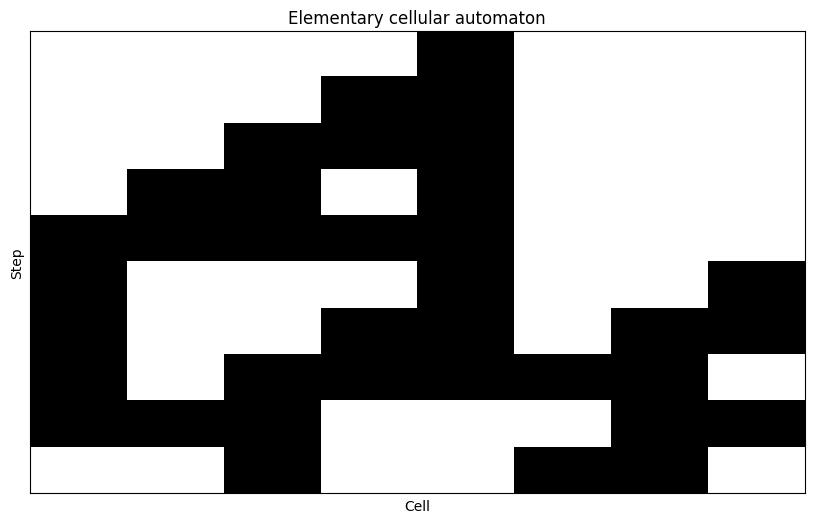

In [10]:
rule_number = 110
steps = 10
L = 8
initial_state = np.zeros(L, dtype=np.uint8) 
initial_state[L//2] = 1

# initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton)

##### Sierpiński triangle: Rule 90

Each cell's state-transition function is the *exclusive or* of its two neighbours.

Because this is equivalent to modulo-2 addition, this generates the modulo-2 version of Pascal's triangle. The diagram has a 1 wherever Pascal's triangle has an odd number, and a 0 wherever Pascal's triangle has an even number.

CA like this are sometimes referred to as replicators because the patterns are making copies of themselves

##### An aside: Do you know modulo arithmetic?
Numbers "wrap around" at the modulus. This is often compared to the way hours wrap around on a clock (modulus $m=12$), days wrap around the week (modulus $m=7$) etc.

- The operation is written as $a \text{ mod } m$, where:
  - $a$ is the number you're working with.
  - $m$ is the modulus.
  - the result is the remainder when $a$ is divided by $m$

- $17 \text{ mod } 5 $ means you divide 17 by 5, which gives 3 with a remainder of 2. So, $17 \text{ mod } 5 = 2 $
- $25 \text{ mod } 7 $ means you divide 25 by 7, which gives 3 with a remainder of 4. So, $25 \text{ mod } 7 = 4 $

<div style="border-left: 4px solid #1e70bf; padding: 0.75em; background-color: #eaf3fb; margin-bottom: 1em;">
  <strong>Theoretical Question:</strong><br>
From a single cell initialisation Rules 18, 22, 26, 82, 146, 154, 210 and 218 also generate the Sierpiński triangle. Why?
</div>

```{toggle}  my answers...
All those rules are, in some sense, variations of Rule 90, so they generate the same underlying fractal pattern from a single-cell start, possibly with simple inversions or flips.

Rule 90 is **additive**: the new state of a cell is just the XOR of its two neighbours:

     $$
     s_i^{t+1} = s_{i-1}^t \oplus s_{i+1}^t
     $$

This linearity over the finite field $\mathrm{GF}(2)$ means its evolution can be analysed as a kind of discrete Pascal’s triangle modulo 2 — which is exactly the Sierpiński triangle.

Rules 18, 22, 26, 82, 146, 154, 210, and 218 are either additive rules themselves, just with different combinations of neighbour contributions, or equivalent to Rule 90 under symmetries (bit flip of 0↔1, left-right reflection, or both).

Wolfram’s classification shows that many rules fall into **equivalence classes** under these simple transformations. Within a class, patterns from a single-seed start are identical up to flipping colours or mirroring.

With a radius-1 CA (like the Wolfram rules), there are $2^3=8$ possible neighbourhoods.
But starting from a single black cell in a sea of white, most of those never appear. 

At $t=0$, you only have 000 100 000 patterns around the centre. As time evolves, only neighbourhoods containing at most two black cells appear in the active region (because additivity forbids “merging” into larger solid blocks from that starting seed).

So the CA’s behaviour in this case is determined entirely by its outputs for just a small subset of the 8 neighbourhoods — specifically the ones that are shared by this set of rules.

```

# Game of Life

Conway's Game of Life is one of the most well-known cellular automata (not the first but arguably the best). It was popularised by Martin Gardener in Scientific American.

![](images/Conway_notes.png)


[Figure from NY times (a great article that is unfortunately behind a paywall)](https://www.nytimes.com/2020/12/28/science/math-conway-game-of-life.html)

It was first explored on a Go board in the Cambridge mathematics department’s tea room — though unlike in Go, where stones are placed on the grid’s vertices, the Game of Life assigns states to the grid’s squares.


Pause for a moment to think about how all of the elements of our one-dimensional cellular automata might work in the context of a two-dimensional cellular automata... 


## The model

- **World:** 2D, square grid (i.e. a square lattice), period boundaries
- **States:** binary
- **Initialisation:** random
- **Neighbourhood:** Moore neighbourhood (the 8 surrounding squares and self)
- **Rules:** ???
- **Visualisation:** To properly visualise the evolution of cells and any emergent patterns patterns we'll need something more than an additional axis for time. In particular, we want an animation.

### State-transition rules
The Wolfram-equivalent two-dimensional cellular automata would have:

$$
\underbrace{2^{\,\overbrace{2^{9}}^{\text{possible neighbourhoods}}}}_{\text{possible rules}} \;=\; 1.340781\times 10^{154}
$$

state-transition rules to define.

Obviously that's way too many to list them out explicitly.



Simplification is often achieved via:
- Rotational symmetry (common if modelling physical phenomena)
- *Totalistic* rules where the state-transition function depends only on the sum of the states 
(which are of course always rotationally symmetric).

A cell can be alive or dead.

Conway simplified things to be based (loosely) on real cell growth with the birth and death depending on population density.

Rules:
- **Loneliness**: alive cells (black) with fewer than 2 alive neighbours will die (turn white)
- **Overcrowding**: alive cells with more than 3 alive neighbours will die
- **Happiness**: alive cells with either 2 or 3 alive neighbours will continue living (stay black)
- **Reproduction**: dead cells with exactly 3 alive neighbours will come alive
- **Dead** cells stay dead.

## (Game of) Life is full of surprises!

This very simple 'game' shows dynamic almost life-like behaviours, which are highly non-trivial and fascinating.

Even though the simulation is very simple and completely determined, there is fundamentally no way to predict what will happen, other than running a specific simulation to find out. This is referred to as *irreducible computability*.
 
Typically, we will see one of three things occur:
1. The cells die out or become stagnant and the simulation effectively ends
2. The cells form into interesting small and stable structures that flip between two (or more) states
3. The cells seem to come alive and start doing unusual things.

1. **Still lifes**

e.g. [the beehive: ](https://conwaylife.com/wiki/Beehive)
<!-- <center>
<img src="images/Beehive.png" width="100">
</center> -->

![](images/Beehive.png)


2. The cells form into interesting small and stable structures that flip between two (or more) states

**Oscillators**

e.g. [the toad is a period 2 oscillator](https://conwaylife.com/wiki/Toad)

<!-- <center>
<img src="images/Toad.png" width="200">
</center> -->

![](images/Toad.png)


3. The cells seem to come alive and start doing unusual things

**Spaceships** are moving oscillators that return to their starting position but shifted in space

e.g. the **glider** is the simplest type of spaceship and the first to be discovered. They are oscillators with period 4, which appear to walk diagonally across the screen:  

![](images/Animated_glider_emblem.gif)


Remember: The squares don't actually 'move'! Humans are very good at seeing patterns, sometimes we are too good at it.  

Conway supposedly regrets calling them gliders as they are much more like 'walkers' or 'crawlers'.

The glider now has fairly widespread use as the [emblem for hackers](http://www.catb.org/hacker-emblem/).

Remember: The squares don't actually 'move'! Humans are very good at seeing patterns, sometimes we are too good at it.  

Conway supposedly regrets calling them gliders as they are much more like 'walkers' or 'crawlers'.

The glider now has fairly widespread use as the [emblem for hackers](http://www.catb.org/hacker-emblem/).

**Guns**

Have parts that repeat periodically, like an oscillator, but they also periodically emit spaceships.

e.g. Gosper's glider gun (from Bill Gosper and a team at MIT), which produces recurrent streams of “organisms” spawned from digital “parents”

![](images/Gospers_glider_gun.gif)

[Fig By Lucas Vieira - Own work, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=101736)



This object was discovered when Conway offered a \\$50 prize (equivalent to \\$380 in 2022) for anyone who could prove/disprove whether the Game of Life could support a pattern that could grow forever (he originally conjectured that no pattern can grow indefinitely)

It's discovery eventually led to the proof that Conway's Game of Life could function as a Turing machine.

##### An aside: Do you know what a Turing machine is?
Theoretical model of computation, introduced by Alan Turing in 1936

It provides a simple but powerful way to capture the fundamental principles of computation and algorithm.

A Turing machine consists of an infinite tape, a tape head, a finite set of states, and a set of rules (transition function). The tape serves as both the input and the working memory, with the head reading and writing symbols one at a time as follows:
- The machine reads the symbol under the tape head
- looks up the corresponding rule based on its current state
- writes a new symbol to the tape (or leaves it as is)
- moves the tape head left or right; and
- transitions to a new state. 
- This process continues until the machine enters the halting state. What's left on the tape is the answer

Note that a Turing machine operates sequentially (one step at a time), whereas a cellular automaton operates in parallel (all cells update simultaneously).

**Methuselas**

From most initial conditions the Game of Life quickly reaches a stable state where the number of live cells is nearly constant (possibly with some oscillation). 

Other patterns are so long-lived, they are called “Methuselahs”. (Methuselah, Noah's grandfather, had the longest lifespan of all those given in the Bible passing away at the grand old age of 969.) 

e.g. [the r-pentomino](https://conwaylife.com/wiki/R-pentomino) is a Methuselah, which doesn't stabilise until generation 1103!:

![](images/r_pentomino.png)


<div style="background-color: #ffff88; padding: 1em; border-left: 5px solid #fff102;">

There are various explanations for such a long life: some believe a mistranslation, others believe that his age is used to give the impression that part of Genesis takes place in a very distant past. 

A pentomino (or 5-omino) is a polyomino of order 5, i.e., a polygon in the plane made of 5 equal-sized squares connected edge to edge. 

</div>

##### Game of Life in action

- [Explorable](https://www.complexity-explorables.org/explorables/nah-dah-dah-nah-nah-opus-1984/)
- [Large-scale patterns](https://www.youtube.com/watch?v=C2vgICfQawE)
- [Clock](https://www.youtube.com/watch?v=3NDAZ5g4EuU&t=13s)
- [Sierpiński triangle](https://www.reddit.com/r/math/comments/fwujar/conways_game_of_life_forms_a_sierpiński_triangle/)
- [Everything you could ever hope to know about the Game of Life](https://link.springer.com/content/pdf/10.1007/978-1-84996-217-9.pdf)

<div style="border-left: 4px solid #1e70bf; padding: 0.75em; background-color: #eaf3fb; margin-bottom: 1em;">
  <strong>Play:</strong><br>
    Can you find an undiscovered emergent pattern like a glider gun or puffer train? 
</div>

``` {toggle}
Not easily... and that is not a coincidence.

Conway chose the rules of Game of Life so that his conjecture (that no pattern can grow indefinitely) would not be obviously true or false.

Of all possible rules for a 2D CA, most yield simple behaviour, i.e. most initial conditions stabilise quickly or grow unboundedly.

By avoiding uninteresting CAs, Conway was also avoiding Wolfram’s Class 1 and Class 2 behaviour, and probably Class 3 as well (more on this in the next session).

If you do happen to stumble across or design something that is yet to be named additional marks are up for grabs! (And naming these patterns is something people take very seriously: Boojum, the Snark, and the Bandersnatch) .
```

# Extensions

- Cellular automata on networks
- Stochastic cellular automata - the state-transition function can be defined probablistically. For example, disease compartment changes state based on the probability of infection/recovery
- Multi-layer cellular automata - the cell state can be a vector not a scalar
- Asynchronous cellular automata - rather than all cells updating their states at once, cells can be chosen at random to update their state (cf. SIS voter model implementation)
- States can be oriented
- Can be combined with neural networks to guide the simulations towards desired outcomes. In recent years research in this area has been progressing, quickly with some astonishing results.

# CA in the real world

The second law of thermodynamics says that things should move from order to disorder.

But life seems to contradict this, self-organising from very simple rules and producing highly complex evolution (a consequence of not operating in equilibrium regimes).

CA have been shown to directly correspond to processes generated by biological evolution.

They capture and describe the transmission of information from one local node to another. Thus, any transmission problem, social or otherwise, can be modeled with a CA with appropriate transmission dynamics.

## In 1D: Rule 30


<div style="margin: 1.5em 0; border-right: 4px solid #888; padding-right: 1em; text-align: right;">
  <div style="font-style: italic; font-family: 'Comic Neue', 'Segoe Script', cursive; font-size: 1.2em;">
The Rule 30 automataon is the most surprising thing I've ever seen in science... It took me several years to absorb how important this was. But in the end, I realised that this one picture contains the clue to what's perhaps the most long-standing mystery in all of science: where, in the end, the complexity of the natural world comes from  </div>
  <div style="font-style: normal; font-size: 0.95em; margin-top: 0.5em;">
    — Stephen Wolfram (Quoted in Forbes)
  </div>
</div>

*Conus textile* (a venemous sea snail)

![](images/Textile_cone.jpeg)


Wolfram patented this as a pseudo-random number generator and a few years ago put [\\$30,000 up as a prize for answering some as yet unanswered questions](https://writings.stephenwolfram.com/2019/10/announcing-the-rule-30-prizes/)

<div style="background-color: #ffff88; padding: 1em; border-left: 5px solid #fff102;">
(true random numbers are hardware generated or generated from blood volume pulse, atmospheric pressure, thermal noise, quantum phenomenon, etc.)
</div>

## In 2D:

![](images/Lizard_cellular_automata.png)

Figure from the article: [*A living mesoscopic cellular automaton made of skin scales*](https://www.nature.com/articles/nature22031). 


# Analysing cellular automata


<div style="margin: 1.5em 0; border-right: 4px solid #888; padding-right: 1em; text-align: right;">
  <div style="font-style: italic; font-family: 'Comic Neue', 'Segoe Script', cursive; font-size: 1.2em;">
People think that mathematics is complicated. Mathematics is the simple bit, it’s the stuff we CAN understand. It’s cats that are complicated.
  </div>
  <div style="font-style: normal; font-size: 0.95em; margin-top: 0.5em;">
    — John Conway 
  </div>
</div>


<div style="background-color: #ffff88; padding: 1em; border-left: 5px solid #fff102;">


We've seen how simple yet powerful rules in cellular automata models can lead to extremely complex and highly nonlinear behaviour. 

Analysing this behaviour in a mathematically elegant way isn't straightforward

Today we will see some options and tricks

</div>

## Rule space

CA models are discrete in time and space, and typically the states of the cells are also discrete.

This means that the number of all possible neighbourhoods and responses to those neighbourhoods is finite and therefore countable... we can actually list out all possible state-transition functions with an exhaustive search if we want to (and are as crazy as Wolfram).

Together, these form the **rule-space**. 

Let: 
- $D$ be the dimension of the space
- $r$ be the radius of the neighbourhood
- $k$ be the number of possible states for a cell

If using a Moore template the size of the neighbourhood will be $2r+1$ neighbours in each dimension and hence the total number of neighbours $n=(2r+1)^D$. 

Each of the cells in a neighbourhood can be in one of $k$ states. Hence the neighbourhood could be one of $c = k^n$ and each of those neighbourhoods needs a state-transition: 

$$
k^c=k^{k^n}=k^{k^{(2r+1)^D}}.
$$



This obviously gets very large, very quickly.

We've seen how Wolfram's elementary CA have $2^{2^3}$ possible sets of 'physics', which was sort of manageable. Game of Life used a totalistic rule to reduce the size of the rule-space from $2^{2^9}$ to a few simple entries in a lookup table

<div style="border-left: 4px solid #1e70bf; padding: 0.75em; background-color: #eaf3fb; margin-bottom: 1em;">
  <strong> Check your understanding:</strong><br>
What is the rule space of:
i) Wolfram's elementary cellular automata; and
ii) Game of life
</div>

``` {toggle}
Here’s the quick answer and the reasoning.

i) **Wolfram’s Elementary Cellular Automata (ECA)**

- Binary states, radius $r=1$ (3-cell neighbourhood → $2^3=8$ neighbourhoods).
- Each neighbourhood maps to 0 or 1 ⇒ number of rules $=2^{2^3}=2^{8}=256$.

ii) All binary 2D Moore-neighbourhood rules without the outer-totalistic restriction, the rule space is $2^{2^{9}}=2^{512}\approx 1.34\times10^{154}$. This is because there are $2^9=512$ possible 3×3 binary neighbourhoods (including the centre). A rule can assign 0/1 to *each* neighbourhood independently, i.e. a Boolean function $f:\{0,1\}^9\to\{0,1\}$. The number of such functions is $2^{512}$.


The Game of Life restricts the rule (life-like, outer-totalistic) so the next state depends only on (a) whether the cell is currently dead/alive and (b) the count of live neighbours (0–8), not their arrangement.

- For a dead cell: choose the set $B\subseteq\{0,\dots,8\}$ of neighbour counts that cause **birth** (that’s $2^9$ possibilities).
- For a **live** cell: choose the set $S\subseteq\{0,\dots,8\}$ of counts that allow **survival** (another $2^9$ possibilities).
  Total: $2^9\cdot2^9=2^{18}=262{,}144$. 
  
i.e. $B=\{3\}, S=\{2,3\}$.

So $2^{512}$ counts all possible 3×3 binary rules; $2^{18}$ counts the much smaller, but still really quite large, 'life-like' subset determined by birth/survival sets over neighbour counts.

```

## Phase-space
The **phase-space**, on the other hand, contains all of the possible configurations - the parallel universes that can emerge from these rules. 

If the space is finite then we can list these too.

Let:
- $L$ be the length of space in each dimension

Then for a regular domain the total number of cells (volume) is $L^D$ and each cell can be in one of $k$ states hence we have $k^{L^D}$ possible configurations.

<div style="border-left: 4px solid #1e70bf; padding: 0.75em; background-color: #eaf3fb; margin-bottom: 1em;">
  <strong> Check your understanding:</strong><br>
What is the phase space of:
i) Wolfram's elementary cellular automata; and
ii) Game of life
</div>

``` {toggle}
The phase space is the set of all global configurations (independent of the update rule).

i) **Elementary cellular automata (binary, 1D)**

- On a finite ring of length $L$: $\{0,1\}^L$ with $|\text{phase space}|=2^{L}$.
- On an infinite line $\mathbb{Z}$: $\{0,1\}^{\mathbb{Z}}$, which has cardinality $2^{\aleph_0}$ (uncountable).

ii) **Game of Life (binary, 2D, Moore neighbourhood)**

- On a finite $M\times N$ torus (or any fixed finite boundary): $\{0,1\}^{MN}$ with $|\text{phase space}|=2^{MN}$.
- On the infinite grid $\mathbb{Z}^2$: $\{0,1\}^{\mathbb{Z}^2}$, also of cardinality $2^{\aleph_0}$.

  (If you restrict to finite-support configurations, that subspace is countable.)

```

## Classifying behaviour

The emerging configurations can be classified (after some transient from a random initialisation).


Wolfram classified each of the 256 CAs into four classes, numbered in order of increasing complexity, based on how they evolve from anything to their eventual patterns.

Whilst it's not exactly a useless classification, it is somewhat ill-defined, qualitative and not necessarily exhaustive or mutually exclusive. It also generalises poorly to other rule-spaces.

##### Class 1
Development of patterns tends towards vacuum - a stable uniform state 

e.g. rules 0 and 32.

![](images/Class_1.png)

Fig from [Wolfram](https://www.wolframscience.com/nks/p231--four-classes-of-behavior/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
def wolfram_ca(rule, num_steps, initial_state):
    """Generate a Wolfram cellular automaton.
    
    INPUTS:
        rule (int): Rule number for the cellular automaton.
        num_steps (int): Number of steps or generations for the automaton.
        initial_state (ndarray): Initial state of the automaton as a 1D array.

    OUTPUTS:
        ndarray: Array representing the cellular automaton with shape (num_steps, num_cells).
    """
    num_cells = len(initial_state)
    automaton = np.zeros((num_steps, num_cells), dtype=np.uint8)
    automaton[0] = initial_state

    # Convert rule to binary representation and ensure it is represented as an 8-bit string
    binary_rule = bin(rule)[2:].zfill(8)

    # Apply rule to generate new states
    for step in range(1, num_steps):
        for i in range(num_cells):
            # Determine the neighborhood states
            left = automaton[step - 1, (i - 1) % num_cells] #here the modulo operator % ensures that the indices wrap around to the opposite end of the automaton if they exceed the range of valid indices. 
            center = automaton[step - 1, i]
            right = automaton[step - 1, (i + 1) % num_cells]
            # Convert neighborhood states to an integer between 0 and 7
            neighborhood = 7 - (left << 2 | center << 1 | right)
            # Apply the rule to determine the new state of the cell
            automaton[step, i] = int(binary_rule[neighborhood])

    return automaton

def plot_ca(automaton, rule):
    """Plot the cellular automaton.
    
    INPUTS: 
        automaton (ndarray): Array representing the cellular automaton.

    OUTPUTS: 
        None
    """
    plt.figure(figsize=(6, 5))
    plt.imshow(automaton, cmap='binary', aspect='auto')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Cell')
    plt.ylabel('Step')
    plt.title(f'Rule {rule}')
    plt.show()


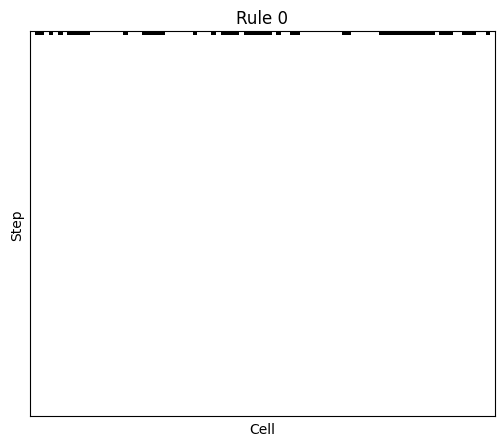

In [2]:
#e.g. rules 0, 32, 160 ...

rule_number = 0
steps = 100
L = 100 

# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

##### Class 2
Patterns tends toward simple stationary -- simple structures that either remain the same forever or repeat every few steps.

e.g. rules 4 and 108

![](images/Class_2.png)

Fig from [Wolfram](https://www.wolframscience.com/nks/p231--four-classes-of-behavior/)

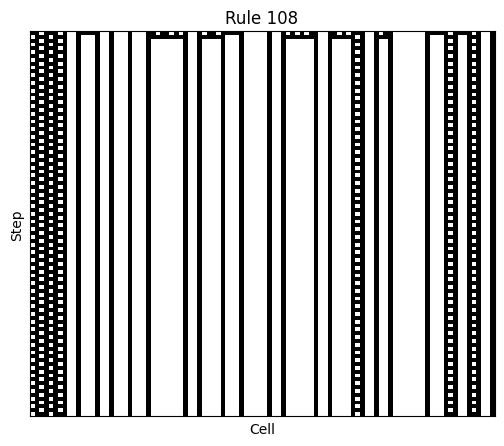

In [3]:
#e.g. rules 4, 108, 218...

rule_number = 108
steps = 100
L = 100 

# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

##### Class 3
*Appear* to generate randomness via intricate nested repeats and periodic patterns 

e.g. rule 30. 

The key word here is 'appear' - remember this is a deterministic rule so it's not actually random and they are more like chaotic systems in this way. Real randomness does challenge determinism more seriously but it is nice, and perhaps surprising, to get apparent randomness from such simple deterministic computation 


![](images/Class_3.png)

Fig from [Wolfram](https://www.wolframscience.com/nks/p231--four-classes-of-behavior/)

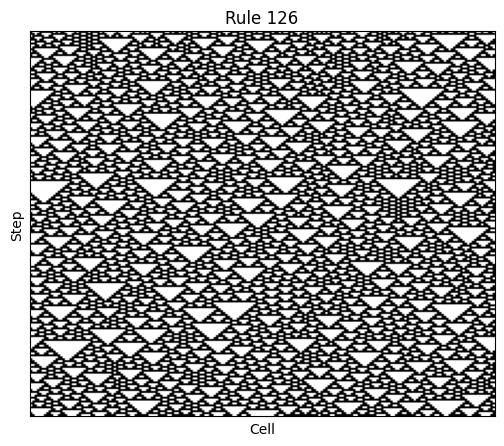

In [4]:
#e.g. rules 22, 30, 126, 150, 182...

rule_number = 126
steps = 200
L = 200 

# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

##### Class 4
Sits at the border of chaos and stability, order and randomness. 

e.g. rule 110, Game of Life  

Creates complicated local and persistent structures that appear as disturbances to the regular background. It allows discussion of objects (spaceships) moving and proposals of information being passed with simple computations being carried out when objects collide. Rule 110 has been proved to be Turing-complete, or 'Universal', i.e. able to simulate any computer program and is arguably the simplest known Turing complete system.

<!-- <center>
<img src="images/Class_4.png" width="300">
</center> -->

![](images/Class_4.png)

Fig from [Wolfram](https://www.wolframscience.com/nks/p231--four-classes-of-behavior/)

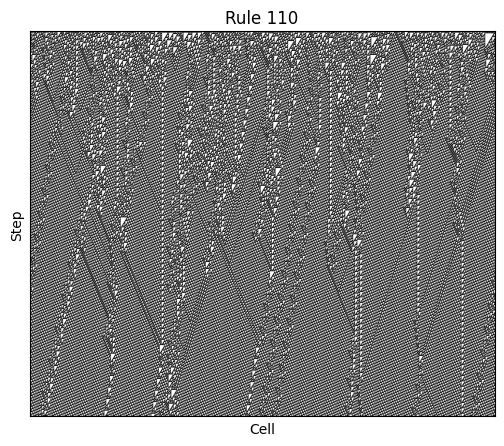

In [5]:
#e.g. rule 110...

rule_number = 110
steps = 500
L = 1000 

# initial_state = np.zeros(L, dtype=np.uint8) 
# initial_state[L//2] = 1

initial_state = [random.randint(0, 1) for _ in range(L)]

automaton = wolfram_ca(rule_number, steps, initial_state)
plot_ca(automaton, rule_number)

### Cellular automata as computers

GoL and Wolfram's Rule 110 support universal computation (moving particles in space and time transfer information from different spatial locations, stored in more regular structures and processed via collisions. Fine in principle, near-impossible in reality because it is slow  and hard).

This behaviour mimics a logic gate, that is, an interaction which produces a 1 or 0, which is a critical aspect of the way our computers process information. Similarly, NAND gates can also be generated, which both computers and neurons use to trigger a signal only when a certain threshold is achieved

If you don't view CA as computers themselves then perhaps you see them as logical universes that computers can be embedded in...?

##### An aside: Turing-complete systems 
Computation is simply information processing (input, stored, transfered, combined or processed, output) and an automata is memory and processor at the same time

Universal computation (aka Turing machines) is a computer that can be programmed to compute any computable function. Only a small set of logical operation is needed to support universal computation 

They are 'Turing complete', in that eventually all possible states can be realised using certain rules and, therefore, any problem that is computable can be solved (assuming no limitations on time or space/memory)

Requirements for Turing-completeness:
- Conditional Branching: ability to make decisions based on conditions (e.g., "if-then-else" statements)
- Repetition/Loops: ability to perform operations repeatedly (e.g., "for" or "while" loops)
- Memory Management: ability to read from and write to a memory store, such as variables or an equivalent data structure.

From a visual inspection, the qualitative differences between Wolfram’s four classes are striking, making it easy to place most rules into their class at a glance.

![](images/Classes.png)

Fig from [Wolfram](https://www.wolframscience.com/nks/p231--four-classes-of-behavior/)

Some rules are trickier because their behaviour doesn’t fit neatly into a single Wolfram class, mixing features depending on the initial condition or the time scale you look at. e.g.:
- Rule 22: Often looks chaotic, but exhibits subtle, long-lived regularities buried in the noise.
- Rule 54: Supports glider-like structures in a mostly periodic background, blurring the line between Class II (periodic) and Class IV (complex).
- Rule 110: Class IV in Wolfram’s scheme, but can look chaotic or periodic depending on the seed and zoom level.
- Rule 126: Appears chaotic from many seeds, yet can produce large periodic regions from others.

These borderline cases are where visual classification becomes unreliable and you need more quantitative measures, like entropy or compressibility, to properly comment on the emergent behaviour.

## State-transition diagrams

We can (try to) visualise the dynamics with a **state-transition diagram**, which unsurprisingly consists of states and transitions between states.

Note: The state-transition functions refer to how the **local** configuration/state updates. A state-transition diagram refers to how the **global** configuration/state updates.

By enumerating all the phase-space configurations and transitions as the configurations evolve, we obtain a list of connections between the discrete states. This can be thought of as aa network. The dynamics of the system can then be analysed e.g. the number of basins of attraction, their sizes, and the properties of the attractors can be explored, topology of the transition network etc...

If the long-term behaviour of the CA 'settles' to a steady state then we could list the possible configurations and present them along with a histogram showing their likely appearance. We could construct this histogram using many Monte Carlo simulations.

### Wolfram: State-transition diagrams

Applet available from Wolfram [here](https://demonstrations.wolfram.com/CellularAutomatonStateTransitionDiagrams/)

Rule 110:
![](images/Rule110.png)

If the entire world was only three cells, then $L=3$:

![](images/Rule110_state_transition_L3.png)

We can do this if the size of the global configuration isn't too large (where by 'too large', I mean not very large at all!)

$L=5$:

![](images/Rule110_state_transition_L5.png)

As the volume of cells gets bigger these diagrams become increasingly complex and direct enumeration becomes impractical.

$L=12$:

![](images/Rule110_state_transition_L12.png)

[Figs from Wolfram](https://demonstrations.wolfram.com/CellularAutomatonStateTransitionDiagrams/)

## Reversability
State-transition diagrams map a configuration, $X$, to its **successor**, $Y$.

$X$ is the **predecessor** of $Y$.

A configuration may have zero, one, or more predecessors, but will always have exactly one successor, i.e. known future, potentially unknown past.

If every configuration has a *unique predecessor* then the CA is **reversible**. 


Hence reversible CA have bijective state-transition functions.

Recall:

![](images/Bijection.png)

- **Failure of injectivity**: information is lost
- **Failure of surjectivity**: some states are unreachable

Surjectivity and injectivity are independent in general — a CA can fail one, both, or neither.


### Wolfram

Trivial rules are typically reversible. There are not many of these:
- cells remain unchanged, Rule 204
- cells flip state, Rule 51
- cells copy the state of a neighbouring cell, e.g. Rule 170
- cell's next state is the XOR (exclusive OR) of its two neighbors, e.g. Rule 90, Rule 150

There are no 'nontrivial' reversible elementary cellular automata.

Rule 254 is an example that is *not* reversible.

<div style="background-color: #ffff88; padding: 1em; border-left: 5px solid #fff102;">

Demonstrate for Rule 254. 

Can check state-transition diagram if configurations can be enumerated. It is clear from small $L$ that there are states in the state-transition diagram that have multiple inputs. This is sufficient to state that the rule is irreversible.

More generally, it is clear that any configuration that doesn’t contain 000 anywhere will map to all 1s.
</div>

### Game of Life
Not reversible.

Consider for instance, that:
- it has many patterns that die out completely (many predecessors)
- Garden of Eden patterns have been discovered (see below)
- the rules of the Game of Life involve a loss of information (the totalistic rule designed by Conway).

Computationally universal CA, such as rule 110 and Game of Life, are often not reversible.

## Garden of Eden states

An *'orphan'* is a pattern with no predecessor (no preimage under the global map of the cellular automata).

A *Garden of Eden* is a configuration that contains an orphan (perhaps the initial configuration but they cannot arise in any other way). i.e.:

$$
\text{There exists a state } c \text{ such that no } c' \text{ maps to it: } F(c') \ne c \text{ for all } c'
$$

This means the global function is **not surjective**: not every configuration has a preimage (*not all outputs are reachable* from some input).

For reversible automata, no Garden of Eden states exist, while non-reversible automata might have such states.

In 1-dimension Garden of Eden states can be found by an efficient algorithm but in higher dimensions it's an undecidable problem. 


### Wolfram

Garden of Eden states are the 'leaves' in the [state-transition diagrams](https://demonstrations.wolfram.com/CellularAutomatonStateTransitionDiagrams/).

e.g. Rule 110 is irreversible, with many Garden of Eden states. Rule 240 is logically reversible.


<div style="border-left: 4px solid #1e70bf; padding: 0.75em; background-color: #eaf3fb; margin-bottom: 1em;">
  <strong>Explore:</strong><br>
Check if this is true for larger $L$ too.

Does that imply global reversibility for arbitrarily large $L$?
</div>


``` {toggle}
To test global reversibility for arbitrary $L$, we can't rely on exhaustively enumerating the transition graph once $L$ gets large. Instead, we use algebraic or structural properties of the rule:

For Rule 240, the update rule is:

$$
s_i(t+1)=s_{i-1}(t)
$$
 
It’s just a right shift, hence the diagonal stripes. 

So each state has a unique predecessor (a left shift), regardless of the boundary conditions or size $L$. Hence, Rule 240 is logically reversible for all $L$.

For Rule 110, things are more complicated.

```

### Game of Life

An example of a Garden of Eden (from R. Banks in 1971):
![](images/Garden_of_Eden_pattern.png)

Reversible CAs thus bear some similarity to Newtonian mechanics, which is microscopically reversible, albeit with discrete time-steps, rather than continuous behaviour governed by differential equations. 

Life on the other hand is frequently irreversible on account of systems being dissipative (arrow of time is essential for life).

In general it is undecidable (not just intractable) whether a CA is reversible i.e. no single algorithm that can take any configuration as input is guaranteed to terminate and find the correct answer of whether it is a Garden of Eden state.


<div style="background-color: #ffff88; padding: 1em; border-left: 5px solid #fff102;">

i.e. truly undecidable in the formal sense of computability theory (a theoretical impossibility, not dependent on practical limitations like time or computational power)

This is akin to the Halting Problem in Turing machines. The Halting Problem is undecidable because there is no general algorithm that can determine whether any arbitrary program will halt or run forever. Similarly, there is no general algorithm that can determine if any arbitrary configuration in the Game of Life is a Garden of Eden state.

The undecidability of this problem has been established through mathematical proofs based on the inherent limitations of computation
</div>

# Mean field approximation 

When there are too many moving parts it's important to think critically about the distinction between “wholes” and “parts”.
 
Reformulating the dynamics in terms of the “average state” can reduce the dimensionality. e.g. The system’s state at iteration $n$, can be approximated just by one variable: the density of 1s, $\rho(n)$.

![](images/GoL_meanfield.png)

This is a **mean-field approximation**.



We then aim to understand how a cell interacts with this average state and how the average state itself changes over time, providing a macroscopic view of the behaviour.

In general, the process is:
- Let $\rho_t=\Pr(\text{a random cell is alive at time }t)$ (or equivalently the fraction of live cells at time $t$).
- Under a **mean-field** assumption (cells are well mixed; neighbours are independent with no spatial correlation and a live probability $\rho_t$).

- The expected live fraction at the next step is a *deterministic function* of $\rho_t$. Hence we derive the 1D deterministic map $\rho_{t+1}=F(\rho_t)$. A cell is alive at $t+1$ if:
    - it was **dead** and $K\in B=\{3\}$, or
    - it was **alive** and $K\in S=\{2,3\}$.

$$
\begin{aligned}
\rho_{t+1}
&=(1-\rho_t)\Pr(K=3)\;+\;\rho_t\big[\Pr(K=2)+\Pr(K=3)\big]\\[2mm]
&=(1-\rho_t)\!\sum_{k\in B}\binom{8}{k}\rho_t^{\,k}(1-\rho_t)^{8-k}
\;+\;\rho_t\!\sum_{k\in S}\binom{8}{k}\rho_t^{\,k}(1-\rho_t)^{8-k}\\[2mm]
&=(1-\rho_t)\binom{8}{3}\rho_t^{3}(1-\rho_t)^{5}
\;+\;\rho_t\!\left[\binom{8}{2}\rho_t^{2}(1-\rho_t)^{6}
+\binom{8}{3}\rho_t^{3}(1-\rho_t)^{5}\right]\\[2mm]
&=\binom{8}{3}\rho_t^{3}(1-\rho_t)^{5}
+\binom{8}{2}\rho_t^{3}(1-\rho_t)^{6}\\[1mm]
&=28\,\rho_t^{3}(1-\rho_t)^{5}(3-\rho_t).
\end{aligned}
$$

- Find the fixed points by solving $\rho=F(\rho)$: besides $\rho=0$, there’s a nonzero fixed point at $\rho^*\approx 0.37$ (mean-field prediction).

Note mean-field approximation greatly overestimates sustained density. Real Game of Life does develop strong correlations (still lifes, oscillators, gliders), driving much lower long-run densities.

Doing this, disregards any spatial relationships and treats every component as uniformly represented by a global average with the dynamics occurring probabilistically. 

But it means that dynamics can be described with a difference equation that can then be analysed with, for example, a cobweb diagram as per MATH3021 (see Sayama for details if you're interested).

Mean-field approximations can perform well in systems with complete or random connections among their components and they are used for all sorts of large-scale dynamical systems. 

Not a bad first step but you must take the results with a grain of salt when it comes to applying it to complex systems like CA because it's ineffective when dealing with local or non-homogenous interactions, or systems that exhibit non-homogeneous patterns of states (i.e. everything we characteristic of a complex system!) 

# Is the universe a simulation?

Natural systems can be mimicked in the artificial programming universes of cellular automata, which means it’s very likely they hold some secrets to the nature of life itself.

(But we must be careful: *'similar pattern does not imply similar process'* - Prof. Sally Thompson, 2024)



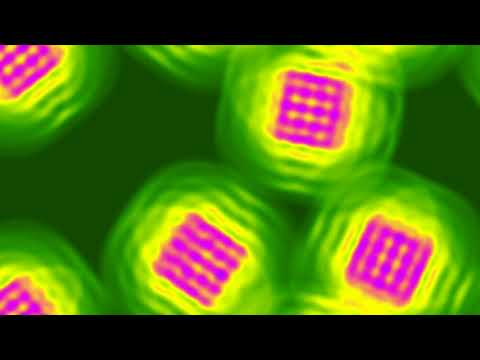

In [11]:
from IPython.display import YouTubeVideo
# YouTubeVideo("video_id_here", width=400)
YouTubeVideo("iE46jKYcI4Y", width=1000) #video from here: https://www.youtube.com/watch?v=iE46jKYcI4Y


Could the universe itself, at its deepest level, operate on the basis of similarly discrete digital rules and cascading green code? Such a scenario was speculated in the 1960s by Ed Fredkin, and later dubbed “It from Bit” by the accomplished physicist John Wheeler.

The 'simulation hypothesis' has remained the focus of much debate surrounding the significance of cellular automata (it's a rabbit hole if you have time you wish to kill).

We probably haven't even scratched the surface of what CA can do.


<div style="border-left: 4px solid #b22222; padding: 0.75em; background-color: #fdecea; margin-bottom: 1em;">
  <strong>Tangential:</strong><br>
    
  Read me: [Do we live in a simulation?](https://theconversation.com/do-we-live-in-a-computer-simulation-like-in-the-matrix-my-proposed-new-law-of-physics-backs-up-the-idea-215552)

(re)watch the Matrix: the dystopian future in which humanity is unknowingly trapped inside the Matrix
</div>


**Example CA---majority rule**

Voting 

The state of a cell can be a $0$ or a $1$.

The rule: A cell changes its state to the local majority of its neighbourhood

This CA model self-organises into separated patches of ones or zeros depending on the initial conditions.


Forrest fire: https://www.complexity-explorables.org/explorables/critically-inflammatory/
        
(epidemic spread)

contact process

Typically: fire seeded in single tree, if your neighbour is on fire you will catch fire, you will be completely charred in a single time step

state={tree, burning, charred/empty}=$\{0,1,2\}$ $
$0\rightarrow 1 \rightarrow 2 \rightarrow 0$

Eventual static state

What's a good metric? Do we measure static final state? Total area burned? What does it depend on? (density of trees p). Or perhaps the time it takes until the fire stops spreading (again a function of p)

